# Orientation of point with respect to line  
Implement 2x2 and 3x3 determinant and compare them with library's implementations in classification on 4 sets of points.  
a) 100000 (x,y) <- (-1000, 1000)^2  
b) 100000 (x,y) <- (-10^14, 10^14)^2  
c) 1000 {(x,y) | x^2+y^2=100^2}  
d) 1000 points lying on line defined by points P1(-1,0), P2(1,0.1)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = []

## 1. Generate points

### 1.a

In [2]:
points.append((np.random.uniform(low=-1000, high=1000, size=(10**5,2)), "Points a"))

### 1.b

In [3]:
points.append((np.random.uniform(low=-10**14, high=10**14, size=(10**5,2)), "Points b"))

### 1.c

In [4]:
r = 100
theta = np.random.uniform(low=0, high=2*np.pi, size=(1000,1))
x = r * np.cos(theta)
y = r * np.sin(theta)
points.append((np.concatenate((x,y), axis=1), "Points c"))

### 1.d

In [5]:
p1 = [-1, 0]
p2 = [1, 0.1]

#y = ax + b
#calculate a, b
a = (p1[1] - p2[1])/(p1[0]-p2[0])
b = p1[1] - a*p1[0]

upper_limit_x = 1000
lower_limit_x = -1000

#find range, such that (-1000<x<1000 i -1000<y<1000)
if a>0:
    upper_limit_x = min((1000-b)/a, upper_limit_x)
    lower_limit_x = max((-1000-b)/a, lower_limit_x)
else:
    upper_limit_x = min((-1000-b)/a, upper_limit_x)
    lower_limit_x = max((1000-b)/a, lower_limit_x)
    
x_d = np.random.uniform(low=lower_limit_x, high=upper_limit_x, size=(1000,1))
y_d = a*x_d + b
points.append((np.concatenate((x_d, y_d), axis=1), "Points d"))

## 2. Points

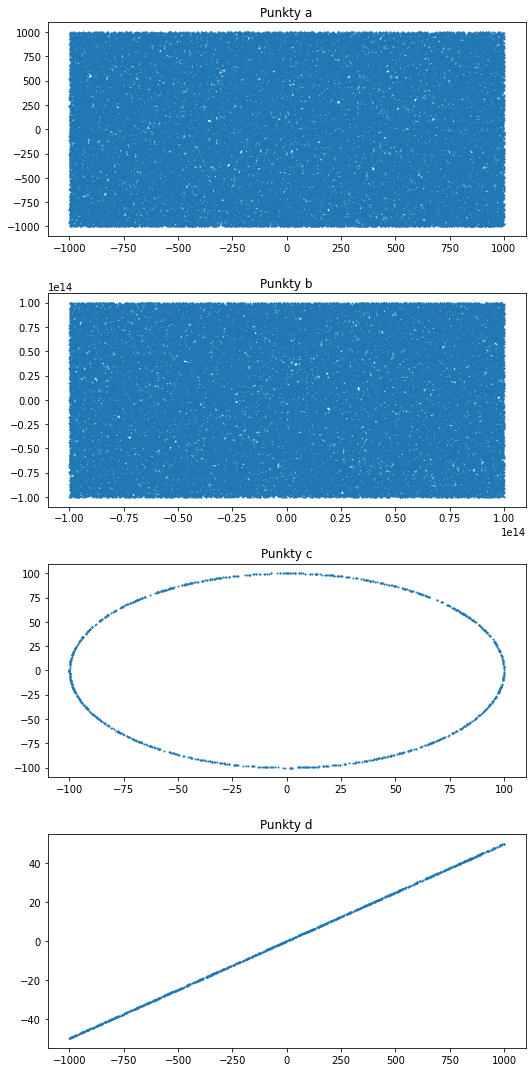

In [6]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,15))

for i in range(4):
    p, title = points[i]
    axes[i].scatter(p[:,0], p[:,1], s=1)
    axes[i].set_title(title)
    
fig.tight_layout(rect=[0.5,0,1,1])
plt.savefig('points.png', bbox_inches='tight')

## 3.Determinants' implementations

In [7]:
def det3(c):
    #a[0] a[1] 1
    #b[0] b[1] 1
    #cx   cy   1
    a = [-1, 0]
    b = [1, 0.1]
    return (a[0]*b[1] + b[0]*c[1] + c[0]*a[1])-(c[0]*b[1] + b[0]*a[1] + a[0]*c[1])


def det2(c):
    a = [-1, 0]
    b = [1, 0.1]
    return ((a[0]-c[0])*(b[1]-c[1]) - (b[0]-c[0])*(a[1]-c[1]))

In [8]:
#NumPy
def np_det2(c):
    a = [-1, 0]
    b = [1, 0.1]
    return np.linalg.det([a-c, b-c])
    
def np_det3(c):
    a = [-1, 0, 1]
    b = [1, 0.1, 1]
    c = np.append(c, [1])
    return np.linalg.det([a, b, c])

In [9]:
from enum import Enum

#Points position
class Where(Enum):
    LEFT = 0
    LINE = 1
    RIGHT = 2

class Result:
    def __init__(self, title, points_title, points, result, xlim, ylim, zero_tolerance=0):
        self.title = title
        self.points_title = points_title
        self.zero_tolerance = zero_tolerance
        self.points = points
        self.result = result
        self.xlim = xlim
        self.ylim = ylim
        
    def get_left(self):
        return self.points[self.result == Where.LEFT]
    
    def get_right(self):
        return self.points[self.result == Where.RIGHT]
    
    def get_line(self):
        return self.points[self.result == Where.LINE]

In [10]:
#Plot two sets of results (for different implementations and tolerations)
def plot(file, r1, r2):
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].set_xlim(r1.xlim)
    axes[0].set_ylim(r1.ylim)
    axes[1].set_xlim(r2.xlim)
    axes[1].set_ylim(r2.ylim)
    
    p1 = r1.get_left()
    axes[0].scatter(p1[:,0], p1[:,1], c='r', s=1)
    p2 = r2.get_left()
    axes[1].scatter(p2[:,0], p2[:,1], c='r', s=1)
    
    p1 = r1.get_line()
    axes[0].scatter(p1[:,0], p1[:,1], c='g', s=1)
    p2 = r2.get_line()
    axes[1].scatter(p2[:,0], p2[:,1], c='g', s=1)
    
    p1 = r1.get_right()
    axes[0].scatter(p1[:,0], p1[:,1], c='b', s=1)
    p2 = r2.get_right()
    axes[1].scatter(p2[:,0], p2[:,1], c='b', s=1)
    
    fig.suptitle(r1.points_title)
    axes[0].set_title(r1.title + '(tolerancja =' + str(r1.zero_tolerance) + ')')
    axes[1].set_title(r2.title + '(tolerancja =' + str(r2.zero_tolerance) + ')')
    
    fig.tight_layout()
    plt.savefig(file)

### Computation

In [11]:
#classify
def classify(x, zero_tolerance):
    if x>zero_tolerance:
        return Where.LEFT
    elif x<-zero_tolerance:
        return Where.RIGHT
    else:
        return Where.LINE
    

def get_results(p, title, points_title, det, zero_tolerance=0):
    xlim = (min(p[:,0]), max(p[:,0]))
    ylim = (min(p[:,1]), max(p[:,1]))

    res = np.apply_along_axis(det, 1, p)
    
    g = lambda x: classify(x, zero_tolerance)
    res = np.vectorize(g)(res)
    
    return Result(title, points_title, p, res, xlim, ylim, zero_tolerance)

In [12]:
#difference between results
class Diff:
    def __init__(self, r1, r2):
        self.r1 = r1
        self.r2 = r2
        self.diffs = {}
        self.c1 = []
        self.c2 = []
        self.get_diff()

    def get_diff(self):
        self.diffs['left -> line'] = self.r1.result[np.logical_and(self.r1.result == Where.LEFT, self.r2.result == Where.LINE)].shape[0]
        self.diffs['left -> right'] = self.r1.result[np.logical_and(self.r1.result == Where.LEFT, self.r2.result == Where.RIGHT)].shape[0]
        self.diffs['line -> left'] = self.r1.result[np.logical_and(self.r1.result == Where.LINE, self.r2.result == Where.LEFT)].shape[0]
        self.diffs['line -> right'] = self.r1.result[np.logical_and(self.r1.result == Where.LINE, self.r2.result == Where.RIGHT)].shape[0]
        self.diffs['right -> left'] = self.r1.result[np.logical_and(self.r1.result == Where.RIGHT, self.r2.result == Where.LEFT)].shape[0]
        self.diffs['right -> line'] = self.r1.result[np.logical_and(self.r1.result == Where.RIGHT, self.r2.result == Where.LINE)].shape[0]
        
        self.c1.append(self.r1.result[self.r1.result == Where.LEFT].shape[0])
        self.c1.append(self.r1.result[self.r1.result == Where.LINE].shape[0])
        self.c1.append(self.r1.result[self.r1.result == Where.RIGHT].shape[0])
        
        self.c2.append(self.r2.result[self.r2.result == Where.LEFT].shape[0])
        self.c2.append(self.r2.result[self.r2.result == Where.LINE].shape[0])
        self.c2.append(self.r2.result[self.r2.result == Where.RIGHT].shape[0])
        
        s = 0
        s += self.diffs['left -> line']
        s += self.diffs['left -> right']
        s += self.diffs['line -> left']
        s += self.diffs['line -> right']
        s += self.diffs['right -> left']
        s += self.diffs['right -> line']
        self.diffs['Suma'] = s
    
    def show(self):
        print("Difference in classification on set (" + self.r1.points_title + ")")
        print(self.r1.title + "(t=" + str(self.r1.zero_tolerance) + ", l=" + str(self.c1[0]) + ", s=" + str(self.c1[1]) + ", p=" + str(self.c1[2]) + ")")
        print(self.r2.title + "(t=" + str(self.r2.zero_tolerance) + ", l=" + str(self.c2[0]) + ", s=" + str(self.c2[1]) + ", p=" + str(self.c2[2]) + ")")
        for k,v in self.diffs.items():
            print(k, " = ", v)

In [13]:
def print_results(file, my_r, np_r):
    plot(file, my_r, np_r)
    Diff(my_r, np_r).show()

#### Det 2x2

In [14]:
my_r = []
np_r = []

for p, p_title in points:
    r1 = get_results(p, "Own Det 2x2", p_title, det2)
    r2 = get_results(p, "NumPy Det 2x2", p_title, np_det2)
    
    my_r.append(r1)
    np_r.append(r2)

Różnice w klasyfikacji punktów (Punkty a)
Własny Wyznacznik 2x2(t=0, l=50140, s=0, p=49860)
NumPy Wyznacznik 2x2(t=0, l=50140, s=0, p=49860)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty b)
Własny Wyznacznik 2x2(t=0, l=50175, s=8, p=49817)
NumPy Wyznacznik 2x2(t=0, l=50175, s=10, p=49815)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  2
Suma  =  2
Różnice w klasyfikacji punktów (Punkty c)
Własny Wyznacznik 2x2(t=0, l=500, s=0, p=500)
NumPy Wyznacznik 2x2(t=0, l=500, s=0, p=500)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty d)
Własny Wyznacznik 2x2(t=0, l=146, s=708, p=146)
NumPy Wyznacznik 2x2(t=0, l=170, s=689, p=141)
lewy -> prosta  =  86
lewy -> prawy 

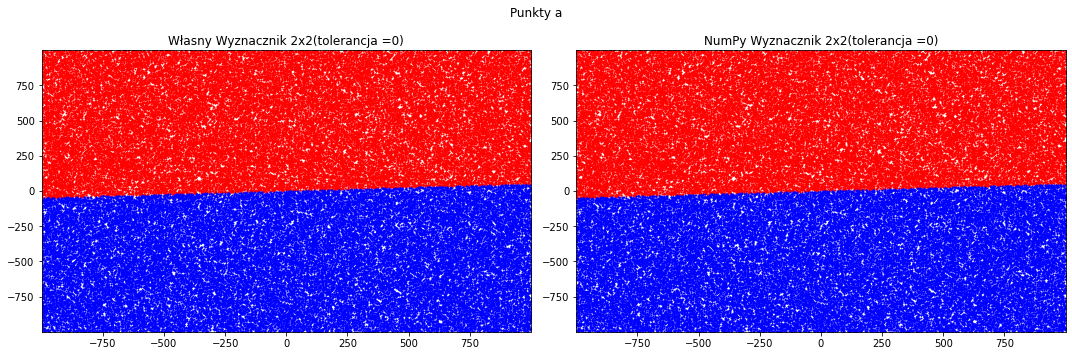

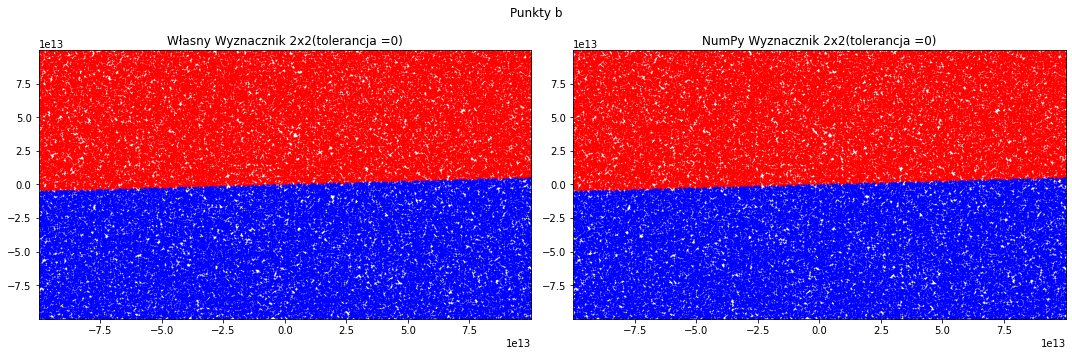

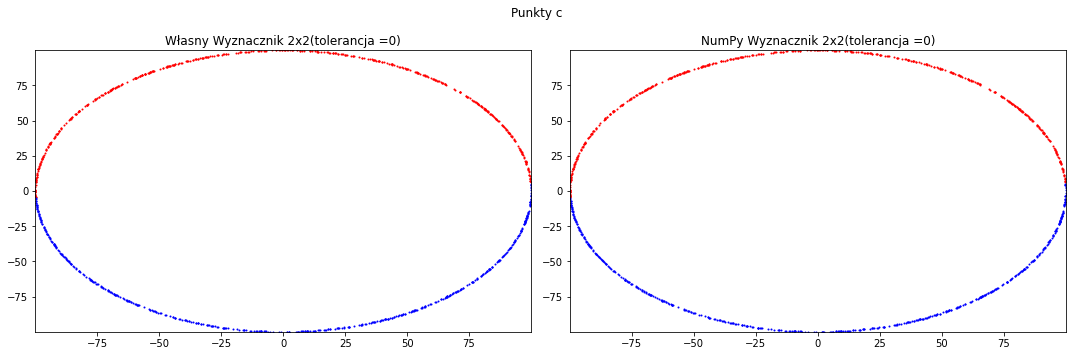

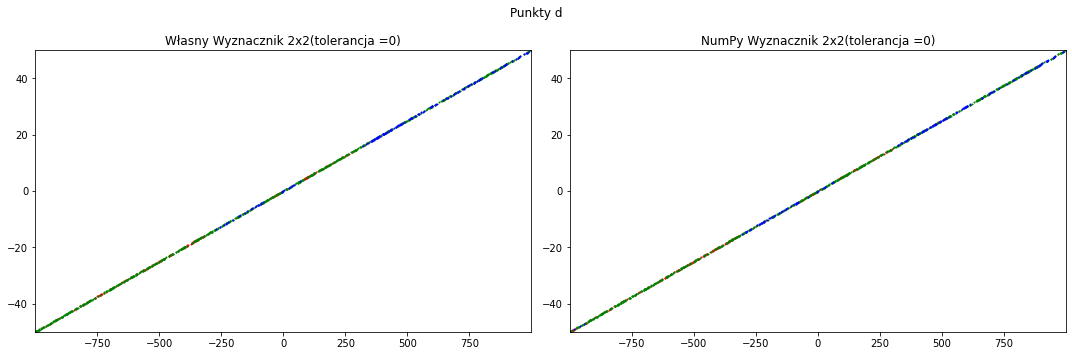

In [15]:
for i in range(4):
    print_results('diff_2x2_t0_' + str(i), my_r[i], np_r[i])

In [16]:
print(my_r[3].result[my_r[3].result != Where.LINE].shape[0])
print(np_r[3].result[np_r[3].result != Where.LINE].shape[0])

292
311


##### Errors in (b)

In [17]:
print(my_r[1].points[my_r[1].result == Where.LINE])

[[ 5.28377890e+13  2.64817673e+12]
 [-3.55848231e+13 -1.78049129e+12]
 [-9.83985889e+13 -4.89501882e+12]
 [-8.02888993e+13 -4.00797751e+12]
 [ 8.26619407e+13  4.12837395e+12]
 [-5.84783055e+13 -2.92563569e+12]
 [ 9.40724531e+13  4.68439543e+12]
 [ 6.42840615e+13  3.20544303e+12]]


In [18]:
print(np_r[1].points[np_r[1].result == Where.LINE])

[[ 3.63253484e+13  1.81644554e+12]
 [ 5.28377890e+13  2.64817673e+12]
 [-3.55848231e+13 -1.78049129e+12]
 [-9.83985889e+13 -4.89501882e+12]
 [-8.02888993e+13 -4.00797751e+12]
 [ 8.26619407e+13  4.12837395e+12]
 [-5.84783055e+13 -2.92563569e+12]
 [-7.62253682e+13 -3.82443849e+12]
 [ 9.40724531e+13  4.68439543e+12]
 [ 6.42840615e+13  3.20544303e+12]]


#### t = 1e-12

In [19]:
my_r12 = []
np_r12 = []

for p, p_title in points:
    r1 = get_results(p, "Own Det 2x2", p_title, det2, 1e-12)
    r2 = get_results(p, "NumPy Det 2x2", p_title, np_det2, 1e-12)
    
    my_r12.append(r1)
    np_r12.append(r2)

Różnice w klasyfikacji punktów (Punkty a)
Własny Wyznacznik 2x2(t=1e-12, l=50140, s=0, p=49860)
NumPy Wyznacznik 2x2(t=1e-12, l=50140, s=0, p=49860)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty b)
Własny Wyznacznik 2x2(t=1e-12, l=50175, s=8, p=49817)
NumPy Wyznacznik 2x2(t=1e-12, l=50175, s=10, p=49815)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  2
Suma  =  2
Różnice w klasyfikacji punktów (Punkty c)
Własny Wyznacznik 2x2(t=1e-12, l=500, s=0, p=500)
NumPy Wyznacznik 2x2(t=1e-12, l=500, s=0, p=500)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty d)
Własny Wyznacznik 2x2(t=1e-12, l=71, s=842, p=87)
NumPy Wyznacznik 2x2(t=1e-12, l=112, s=789, p=99)
lewy ->

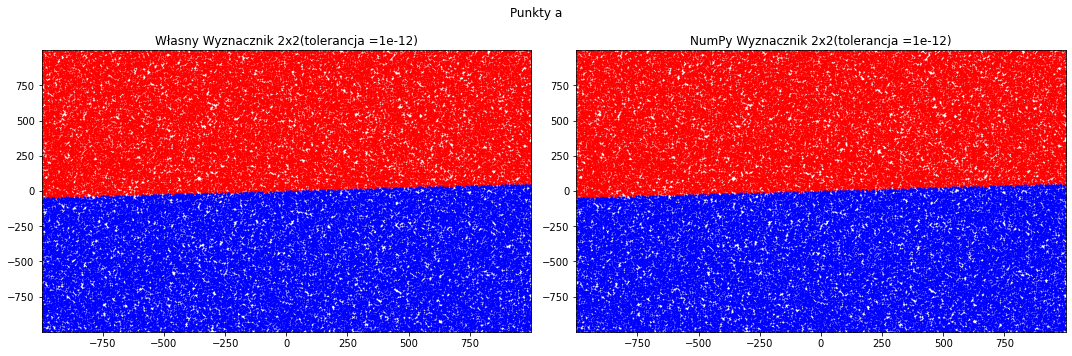

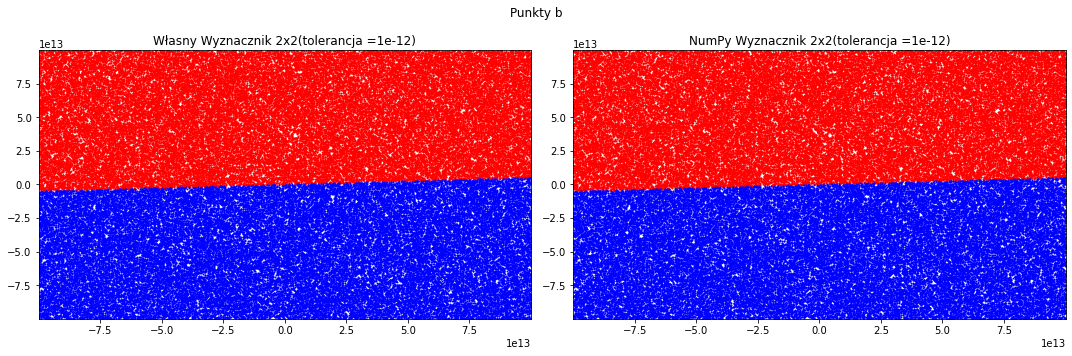

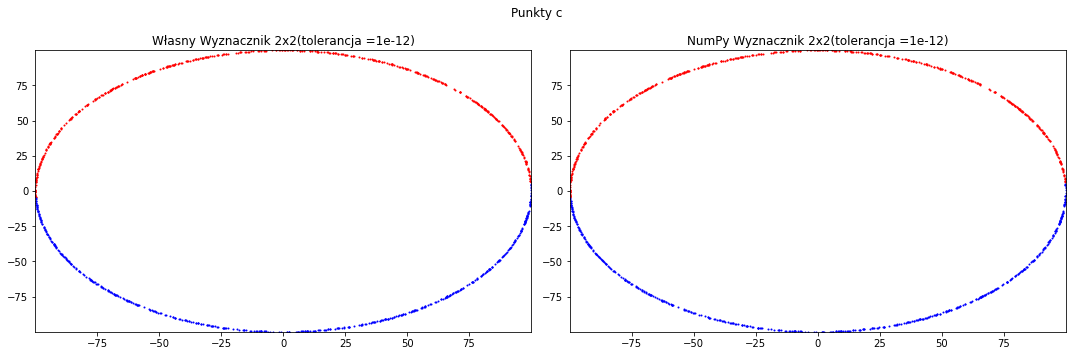

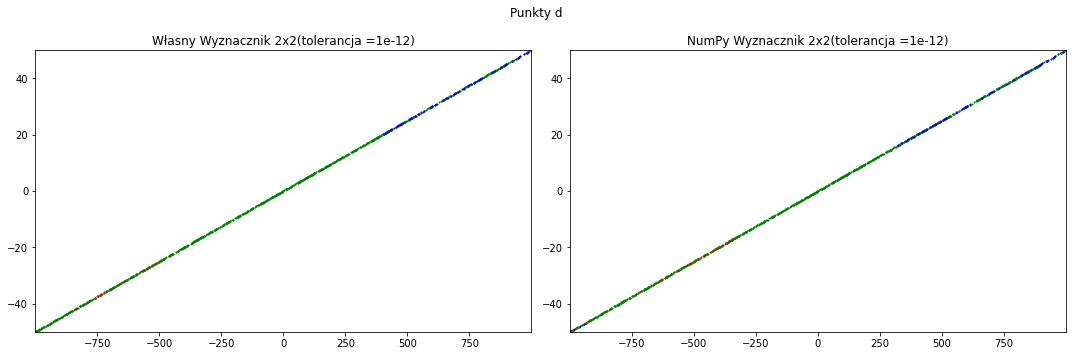

In [20]:
for i in range(4):
    print_results('diff_2x2_t12_' + str(i), my_r12[i], np_r12[i])

In [21]:
print(my_r12[3].result[my_r12[3].result != Where.LINE].shape[0])
print(np_r12[3].result[np_r12[3].result != Where.LINE].shape[0])

158
211


#### t = 1e-10

In [22]:
my_r10 = []
np_r10 = []

for p, p_title in points:
    r1 = get_results(p, "Own Det 2x2", p_title, det2, 1e-10)
    r2 = get_results(p, "NumPy Det 2x2", p_title, np_det2, 1e-10)
    
    my_r10.append(r1)
    np_r10.append(r2)

Różnice w klasyfikacji punktów (Punkty a)
Własny Wyznacznik 2x2(t=1e-10, l=50140, s=0, p=49860)
NumPy Wyznacznik 2x2(t=1e-10, l=50140, s=0, p=49860)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty b)
Własny Wyznacznik 2x2(t=1e-10, l=50175, s=8, p=49817)
NumPy Wyznacznik 2x2(t=1e-10, l=50175, s=10, p=49815)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  2
Suma  =  2
Różnice w klasyfikacji punktów (Punkty c)
Własny Wyznacznik 2x2(t=1e-10, l=500, s=0, p=500)
NumPy Wyznacznik 2x2(t=1e-10, l=500, s=0, p=500)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty d)
Własny Wyznacznik 2x2(t=1e-10, l=0, s=1000, p=0)
NumPy Wyznacznik 2x2(t=1e-10, l=0, s=1000, p=0)
lewy -> pr

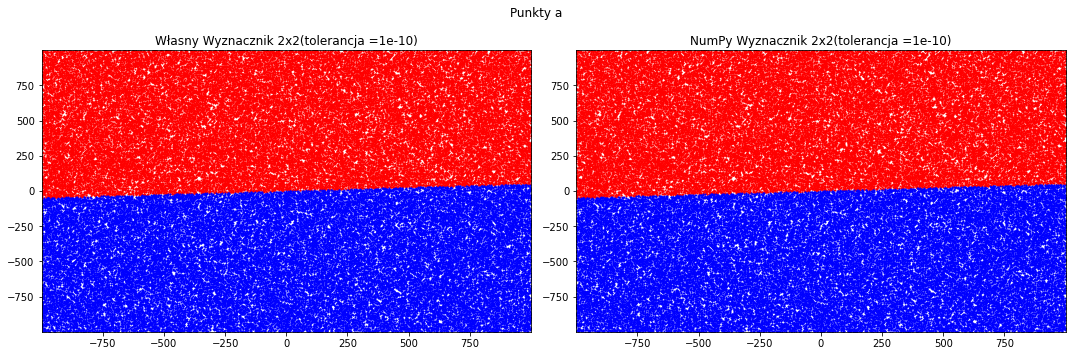

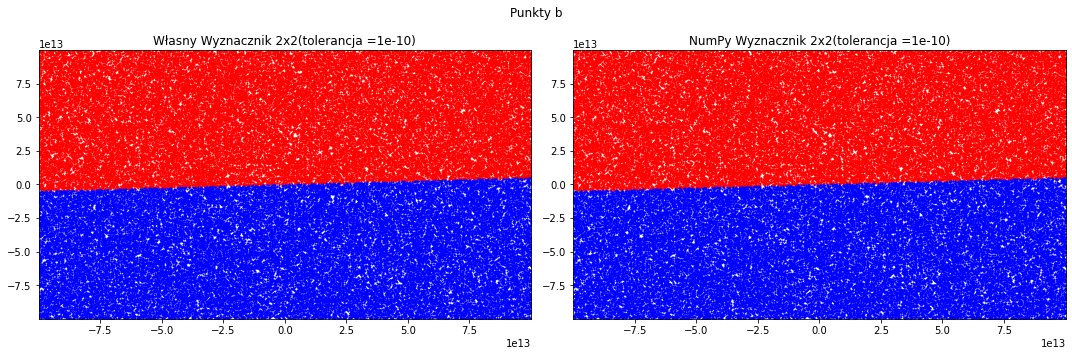

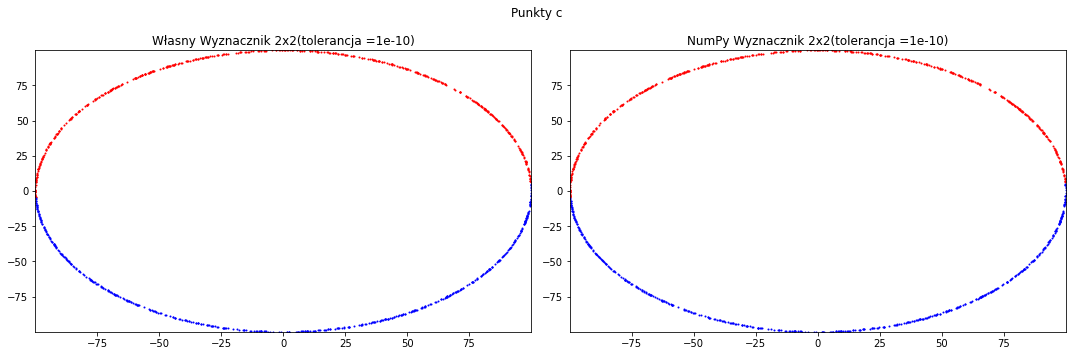

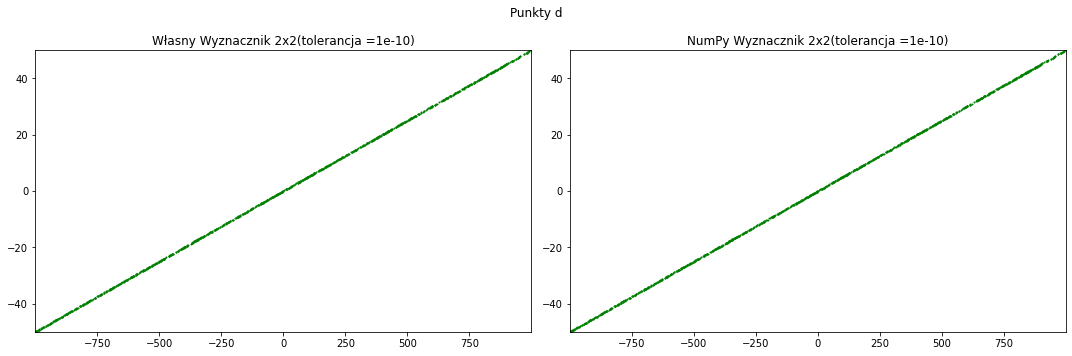

In [23]:
for i in range(4):
    print_results('diff_2x2_t10_' + str(i), my_r10[i], np_r10[i])

In [24]:
print(my_r10[3].result[my_r10[3].result != Where.LINE].shape[0])
print(np_r10[3].result[np_r10[3].result != Where.LINE].shape[0])

0
0


### Det 3x3

In [25]:
my_r = []
np_r = []

for p, p_title in points:
    r1 = get_results(p, "Own Det 3x3", p_title, det3)
    r2 = get_results(p, "NumPy Det 3x3", p_title, np_det3)
    
    my_r.append(r1)
    np_r.append(r2)

Różnice w klasyfikacji punktów (Punkty a)
Własny Wyznacznik 3x3(t=0, l=50140, s=0, p=49860)
NumPy Wyznacznik 3x3(t=0, l=50140, s=0, p=49860)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty b)
Własny Wyznacznik 3x3(t=0, l=50179, s=0, p=49821)
NumPy Wyznacznik 3x3(t=0, l=50179, s=0, p=49821)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty c)
Własny Wyznacznik 3x3(t=0, l=500, s=0, p=500)
NumPy Wyznacznik 3x3(t=0, l=500, s=0, p=500)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty d)
Własny Wyznacznik 3x3(t=0, l=154, s=441, p=405)
NumPy Wyznacznik 3x3(t=0, l=371, s=280, p=349)
lewy -> prosta  =  32
lewy -> prawy  

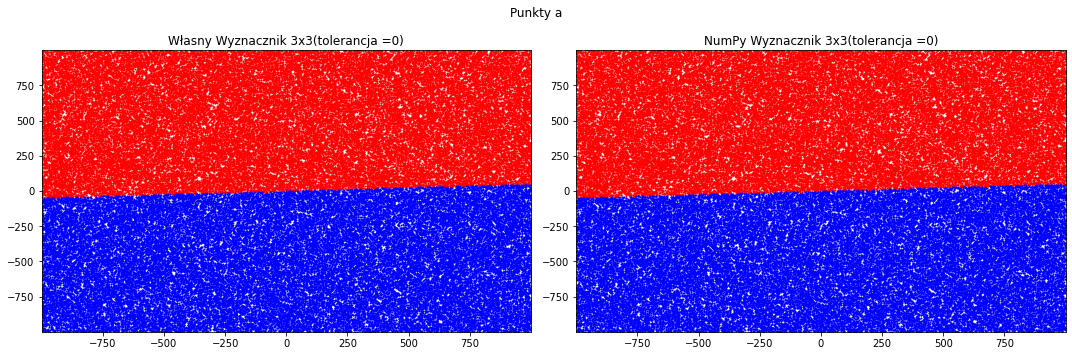

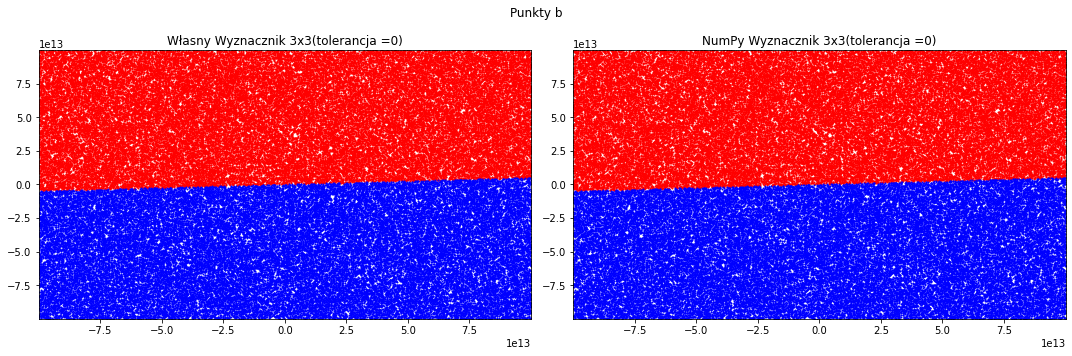

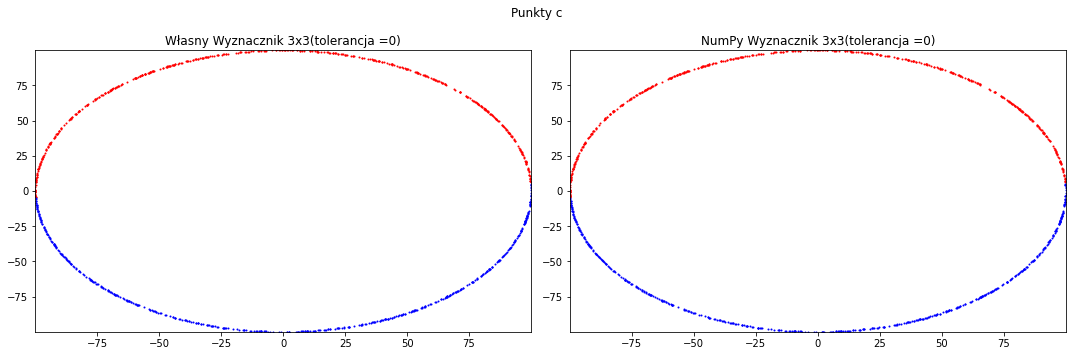

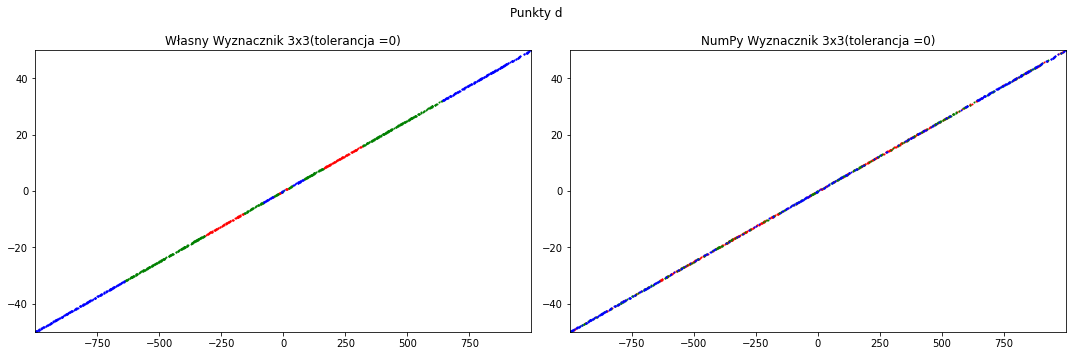

In [26]:
for i in range(4):
    print_results('diff_3x3_t0_' + str(i), my_r[i], np_r[i])

In [27]:
print(my_r[3].result[my_r[3].result != Where.LINE].shape[0])
print(np_r[3].result[np_r[3].result != Where.LINE].shape[0])

559
720


#### t = 1e-14

In [28]:
my_r14 = []
np_r14 = []

for p, p_title in points:
    r1 = get_results(p, "Own Det 3x3", p_title, det3, 1e-14)
    r2 = get_results(p, "NumPy Det 3x3", p_title, np_det3, 1e-14)
    
    my_r14.append(r1)
    np_r14.append(r2)

Różnice w klasyfikacji punktów (Punkty a)
Własny Wyznacznik 3x3(t=1e-14, l=50140, s=0, p=49860)
NumPy Wyznacznik 3x3(t=1e-14, l=50140, s=0, p=49860)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty b)
Własny Wyznacznik 3x3(t=1e-14, l=50179, s=0, p=49821)
NumPy Wyznacznik 3x3(t=1e-14, l=50179, s=0, p=49821)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty c)
Własny Wyznacznik 3x3(t=1e-14, l=500, s=0, p=500)
NumPy Wyznacznik 3x3(t=1e-14, l=500, s=0, p=500)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty d)
Własny Wyznacznik 3x3(t=1e-14, l=0, s=1000, p=0)
NumPy Wyznacznik 3x3(t=1e-14, l=9, s=899, p=92)
lewy -> pro

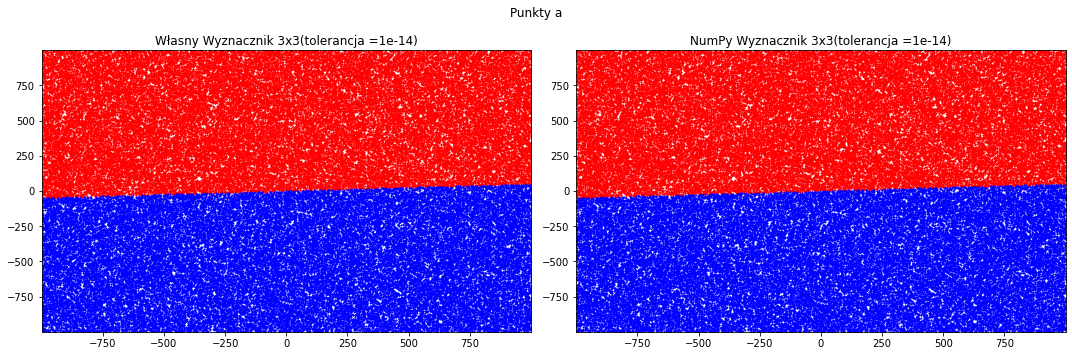

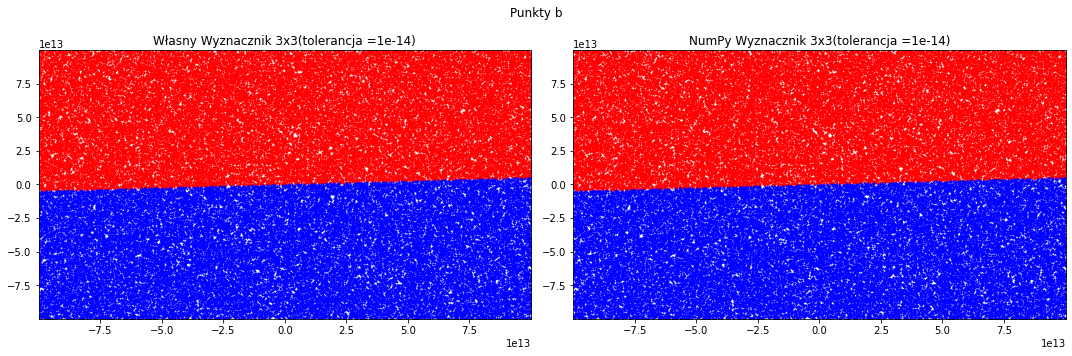

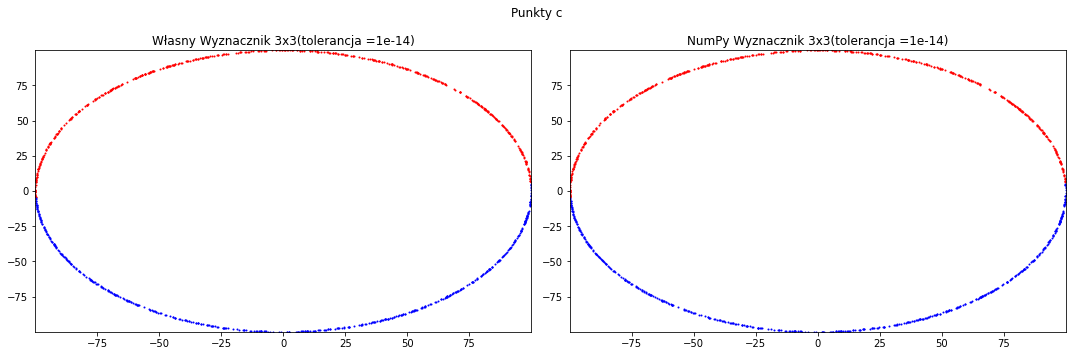

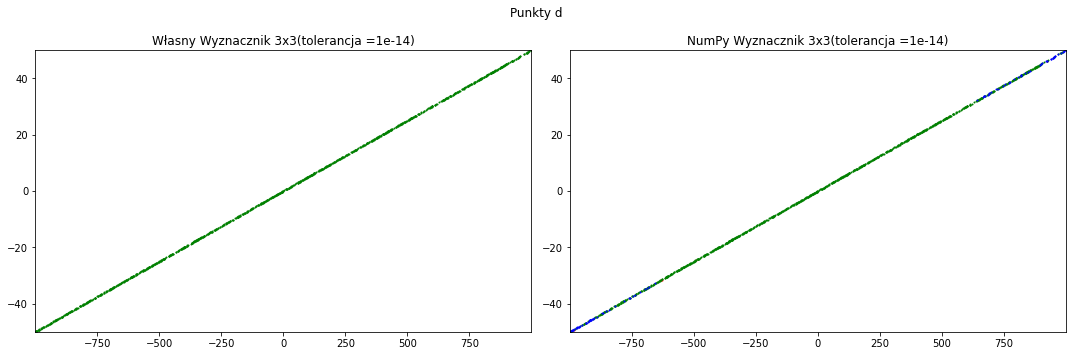

In [29]:
for i in range(4):
    print_results('diff_3x3_t14_' + str(i), my_r14[i], np_r14[i])

In [30]:
print(my_r14[3].result[my_r14[3].result != Where.LINE].shape[0])
print(np_r14[3].result[np_r14[3].result != Where.LINE].shape[0])

0
101


#### t = 1e-13

In [31]:
my_r13 = []
np_r13 = []

for p, p_title in points:
    r1 = get_results(p, "Own Det 3x3", p_title, det3, 1e-13)
    r2 = get_results(p, "NumPy Det 3x3", p_title, np_det3, 1e-13)
    my_r13.append(r1)
    np_r13.append(r2)

Różnice w klasyfikacji punktów (Punkty a)
Własny Wyznacznik 3x3(t=1e-13, l=50140, s=0, p=49860)
NumPy Wyznacznik 3x3(t=1e-13, l=50140, s=0, p=49860)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty b)
Własny Wyznacznik 3x3(t=1e-13, l=50179, s=0, p=49821)
NumPy Wyznacznik 3x3(t=1e-13, l=50179, s=0, p=49821)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty c)
Własny Wyznacznik 3x3(t=1e-13, l=500, s=0, p=500)
NumPy Wyznacznik 3x3(t=1e-13, l=500, s=0, p=500)
lewy -> prosta  =  0
lewy -> prawy  =  0
prosta -> lewy  =  0
prosta -> prawy  =  0
prawy -> lewy  =  0
prawy -> prosta  =  0
Suma  =  0
Różnice w klasyfikacji punktów (Punkty d)
Własny Wyznacznik 3x3(t=1e-13, l=0, s=1000, p=0)
NumPy Wyznacznik 3x3(t=1e-13, l=0, s=1000, p=0)
lewy -> pro

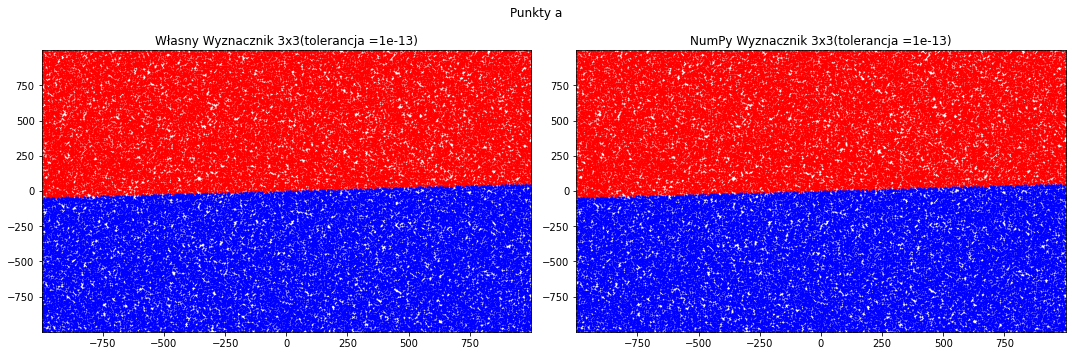

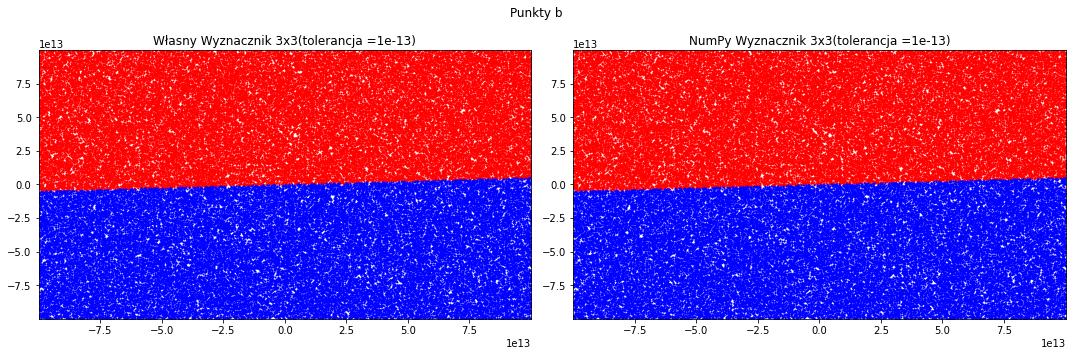

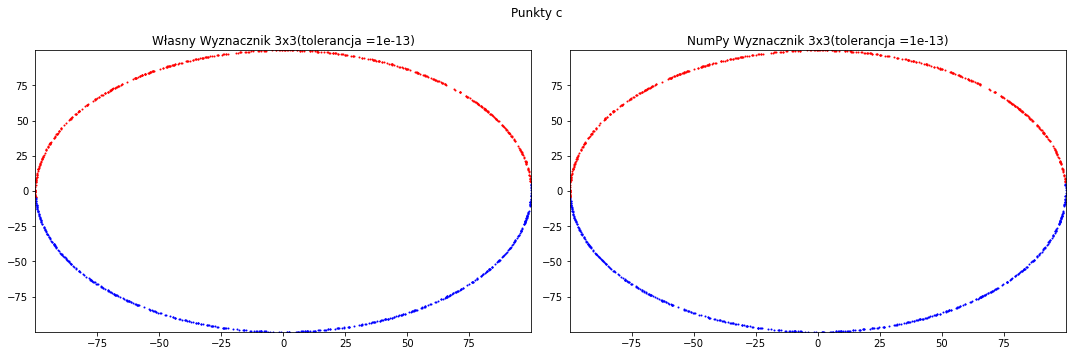

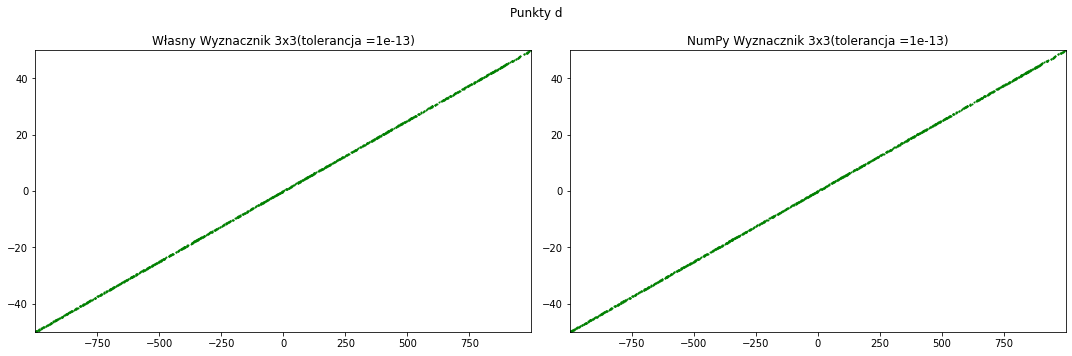

In [32]:
for i in range(4):
    print_results('diff_3x3_t13_' + str(i), my_r13[i], np_r13[i])

In [33]:
print(my_r13[3].result[my_r13[3].result != Where.LINE].shape[0])
print(np_r13[3].result[np_r13[3].result != Where.LINE].shape[0])

0
0
